# Statistical NLP : Blog Authorship Corpus_Statistical NLP_R8_Project1

## Blog Authorship Corpus

- **Project Name : Blog Authorship Corpus**

##### **Project Description**
- Classification is probably the most popular task that you would deal with in real life.
Text in the form of blogs, posts, articles, etc. is written every second. It is a challenge to predict the
information about the writer without knowing about him/her.
- We are going to create a classifier that predicts multiple features of the author of a given text.
- We have designed it as a Multilabel classification problem.

##### **Dataset**
- Over 600,000 posts from more than 19 thousand bloggers
- The Blog Authorship Corpus consists of the collected posts of 19,320 bloggers gathered from
blogger.com in August 2004. The corpus incorporates a total of __681,288 posts and over 140 million
words - or approximately 35 posts and 7250 words per person.__
- Each blog is presented as a separate file, the name of which indicates a blogger id# and the
blogger’s self-provided gender, age, industry, and astrological sign. (All are labeled for gender and
age but for many, industry and/or sign is marked as unknown.)
- All bloggers included in the corpus fall into one of three age groups:
    - 8240 "10s" blogs (ages 13-17)
    - 8086 "20s" blogs(ages 23-27)
    - 2994 "30s" blogs (ages 33-47)
- For each age group, there is an equal number of male and female bloggers.
Each blog in the corpus includes at least 200 occurrences of common English words. All formatting
has been stripped with two exceptions. Individual posts within a single blogger are separated by the
date of the following post and links within a post are denoted by the label urllink.
- Link to Dataset  https://www.kaggle.com/rtatman/blog-authorship-corpus

In [0]:
import pandas as pd
import numpy as np
import re
import gc
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth', -1)

In [25]:
import nltk
from nltk import word_tokenize, pos_tag
nltk.download('wordnet')
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
from nltk import punkt

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import average_precision_score, roc_auc_score, precision_recall_fscore_support
from sklearn.metrics import multilabel_confusion_matrix,classification_report

In [27]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [28]:
!ls '/gdrive/My Drive/AIML/Statistical_NLP_R8_Project 1'

 blogtext.csv			      'Statistical NLP-Project-1_R8_V1.ipynb'
'Statistical NLP-Project-1_R8.ipynb'


### 1. Load the dataset (5 points)

#### a. Tip: As the dataset is large, use fewer rows. Check what is working well on your machine and decide accordingly.

In [0]:
#read the dataset and load it to pandas dataframe

#data = pd.read_csv("blogtext.csv")
data = pd.read_csv("/gdrive/My Drive/AIML/Statistical_NLP_R8_Project 1/blogtext.csv")

In [30]:
#shape of dataset

data.shape

(681284, 7)

In [129]:
#dtypes of dataset columns

data.dtypes

id        int64 
gender    object
age       int64 
topic     object
sign      object
date      object
text      object
dtype: object

In [130]:
#Columns in dataset

data.columns

Index(['id', 'gender', 'age', 'topic', 'sign', 'date', 'text'], dtype='object')

In [131]:
#first two rows with head()

data.head(2)

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages, and 4.5 MB of .pdf files) Now i have to wait untill our team leader has processed it and learns html."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewes van der Laag urlLink mail Ruiyu Xie urlLink mail Bryan Aaldering (me) urlLink mail


In [133]:
#last five rows with tail()

data.tail()

,id,gender,age,topic,sign,date,text
681156,4260903,female,34,indUnk,Virgo,"23,August,2004","I ran around cleaning all morning because Grandma (and Mom and Dad) was coming at 11am. we went nuts and the whole family was actually helping. Thank goodness they were 1 1/2 hours late. We got a lot done - plus did some 'stash-and-dash'. Of course as soon as Mom got there she pointed out all the stuff on the stairwell I forgot about. Grandma was no trouble and after I drank coffee (Mom stress, I guess) I ate well all morning and afternoon. I started with a few bananas in the morning and an hour or so later I ate a almost a whole canteloupe. I was trying to get the kids to eat it, but they didn't want much. In the afternoon I ate a nectarine. By dinnertime I was really hungry. I know I need to eat more during the day, but I don't feel so hungry until I smell dinner cooking. Bill made chicken wings, string beans, and rice. I read another article about how rushing into going 100% raw is way too severe for most people. It pretty much made me feel better about the rate I'm going. Ideally, any cooked food I eat should be vegan or at least vegetarian, but I'm only two weeks into this and I know I'll get there. I ordered a couple of 'raw' books. The onle by Shazzie and the one by Alissa Cohen. It will definitely help me to have these in front of me and always visible for constant motivation. Dd (8), Julia, has mild ADD and I have her on a homeopathic/vitamin therapy called Attend by Vaxa. It's been several weeks and I don't see much, if any, improvement. Maybe I need to give it more time. I'm expecting the second bottle today. I'm going to encourage her to go raw with me. I know raw living is good for mental clarity and has helped kids with ADD. The Hallelujah Acres website mentions Barleygreen (Barleymax?) as an essential supplement. It's supposed to be great for kids with ADD - along with a high raw diet. I'm going to try that very soon, too. I'm also trying behavior modification, and maybe neurofeedback somewhere in the future. I will never put her on medication. So, the weekly stats are exactly the same as last week. I think I'm going to do things a bit differently this week. I know the books will help. I want to see a change by next Sunday!"
681157,4260903,female,34,indUnk,Virgo,"21,August,2004","We just got back from Six Flags (New England). What a cool place. The kids had a great time and thank goodness we got to crash at a hotel last night. I don't think I would have been able to make the drive home at 10pm. I was worried about eating, but did ok under the circumstances. I ate half of my last mango Friday morning followed by coffee and a roll for the drive up. At the park I had a beautiful, huge salad for lunch with a bottle of Poland Spring. I felt so good after that. Dinner and this morning's breakfast was a different story. Now that we're home, though, I'm doing good. I just had a red plum and am about to have some Greek salad that Bill is making. His has feta, mine won't , but it has romaine, tomatoes, red onion, cucumber, and green pepper. It's getting a little easier to break old habits and not eat like a pig just because everyone else is. I really love food and I'm glad I can eat a lot of the raw food and still feel in control. Grandma is coming over tomorrow. We kind of have to 'babysit' her since Mom and Dad are going to a party and Gram has dementia and can't be alone. I'm happy to, though. She's no trouble. I try out a few raw things on her sometimes when I go visit (she lives with my parents) and she really likes them - especially carrot juice. It's funny, after carrot juice, Grandma starts walking around the house a lot. I guess it really does give you energy! Tomorrow I weigh myself. Sigh. I didn't do all that great this week, so I probably haven't lost anything yet. No matter, it'll just motivate me to do better next week."
681158,4260903,female,34,indUnk,Virgo,"19,August,2004","urlLink I felt kind of energetic today . I

In [34]:
#Check Null values

data.isna().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

In [35]:
#Check duplicates in Text column

data['text'].duplicated().sum()

69632

In [0]:
#Drop duplicates in Text column

data.drop_duplicates(subset='text', keep='first', inplace = True)

In [37]:
#shape of dataset after removing duplicates

data.shape

(611652, 7)

In [38]:
data['text'].str.len().sort_values(ascending=False).head()

529872    790123
302666    620448
658665    411850
31751     321278
384759    295127
Name: text, dtype: int64

In [39]:
#5-point summary of length of blogs in text column

data['text'].str.len().describe()

count    611652.000000
mean     1163.233872  
std      2419.298950  
min      4.000000     
25%      250.000000   
50%      676.000000   
75%      1459.000000  
max      790123.000000
Name: text, dtype: float64

#### Observtions:
- There are 611652 blogs in the dataset
- smallest blog is of length 4 and largest blog is of length 790123
- average length of blog is 163

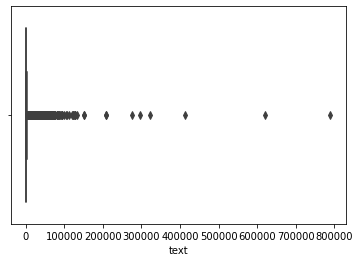

In [40]:
# Boxplot of length of blogs in text column

sns.boxplot(data['text'].str.len())
plt.show()

#### Observations:
- Boxplot shows that there are some outliers in the blogs.blogs which are very long and away from the mean can be removed

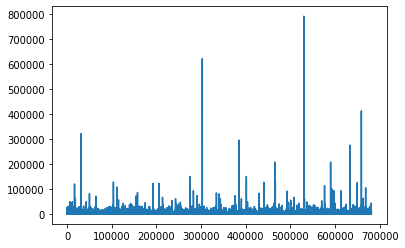

In [41]:
#plot of blogs of all lengths
plt.plot(data['text'].str.len())
plt.show()

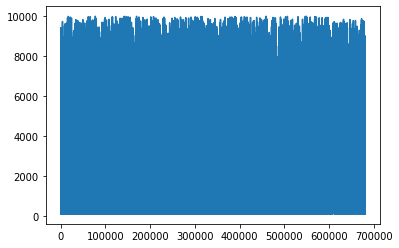

In [42]:
#plot of blogs which have consistent length
plt.plot(data.loc[(data['text'].str.len() <= 10000) & (data['text'].str.len() >= 100)]['text'].str.len())
plt.show()

In [43]:
print("No of Blogs with length less than or equal to 10000 :",(data['text'].str.len() <= 10000).sum())
print("No of Blogs with length greater than 10000 :",(data['text'].str.len() >10000).sum())
print("No of Blogs with length greater than or equal to 100 :",(data['text'].str.len() >= 100).sum())
print("No of Blogs with length less than 100 :",(data['text'].str.len() <100).sum())

No of Blogs with length less than or equal to 10000 : 609183
No of Blogs with length greater than 10000 : 2469
No of Blogs with length greater than or equal to 100 : 549783
No of Blogs with length less than 100 : 61869


In [44]:
((data['text'].str.len() <= 10000) & (data['text'].str.len() >= 100)).sum()

547314

#### Observations:
- The plot of length of texts show that there are blogs which are very long.
- To overcome memory errors we can consider only a small subset of the corpus.
- Here we are taking 50000 blogs as our dataset

In [0]:
blog = data.iloc[0:50000]
blog = blog.drop(['id', 'date'], axis=1)
blog = blog.dropna()

In [47]:
blog.shape

(50000, 5)

In [48]:
blog.columns

Index(['gender', 'age', 'topic', 'sign', 'text'], dtype='object')

### 2. Preprocess rows of the “text” column (7.5 points)

#### a. Remove unwanted characters

In [49]:
blog['text'][0:6]

0               Info has been found (+/- 100 pages, and 4.5 MB of .pdf files) Now i have to wait untill our team leader has processed it and learns html.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [0]:
#Remove all characters except alphabets, digits and spaces

blog['text_clean'] = [re.sub("[^a-zA-Z0-9 ]+","", text) for text in blog['text']]

In [51]:
blog['text_clean'][0:6]

0               Info has been found  100 pages and 45 MB of pdf files Now i have to wait untill our team leader has processed it and learns html                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

#### b. Convert text to lowercase

In [0]:
#convert each blog to lower case

blog['text_clean'] = [text.lower() for text in blog['text_clean']]

In [53]:
blog['text_clean'][0:6]

0               info has been found  100 pages and 45 mb of pdf files now i have to wait untill our team leader has processed it and learns html                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

#### c. Remove unwanted spaces

In [0]:
blog['text_clean'] = [re.sub("\s+"," ", text).strip() for text in blog['text_clean']]

In [55]:
blog['text_clean'][0:6]

0    info has been found 100 pages and 45 mb of pdf files now i have to wait untill our team leader has processed it and learns html                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

#### d. Remove stopwords

In [0]:
stop = stopwords.words('english')
blog['text_clean'] = blog['text_clean'].apply( lambda t : " ".join( word for word in t.split() 
                                                       if len(word)>2 if word not in stop ) )

In [58]:
blog['text_clean'][0:6]

0    info found 100 pages pdf files wait untill team leader processed learns html                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

#### Lemmatize the text

In [0]:
#Lemmatization
lemmatizer = WordNetLemmatizer()
# perform lemmatization on the title
blog['text_clean'] = blog['text_clean'].apply( lambda t : " ".join( [lemmatizer.lemmatize(word) for word in t.split()  ]) )

In [60]:
blog['text_clean'][0:6]

0    info found 100 page pdf file wait untill team leader processed learns html                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

### 3. Merge all the label columns together, for a particular sentence (7.5 points)

- As we want to make this into a multi-label classification problem, you are required to merge all the label columns together, so that we have all the labels together for a particular sentence

In [61]:
blog.columns

Index(['gender', 'age', 'topic', 'sign', 'text', 'text_clean'], dtype='object')

In [62]:
blog.head(2)

,gender,age,topic,sign,text,text_clean
0,male,15,Student,Leo,"Info has been found (+/- 100 pages, and 4.5 MB of .pdf files) Now i have to wait untill our team leader has processed it and learns html.",info found 100 page pdf file wait untill team leader processed learns html
1,male,15,Student,Leo,These are the team members: Drewes van der Laag urlLink mail Ruiyu Xie urlLink mail Bryan Aaldering (me) urlLink mail,team member drewes van der laag urllink mail ruiyu xie urllink mail bryan aaldering urllink mail


#### a. Label columns to merge: “gender”, “age”, “topic”, “sign”

In [0]:
#Merge all four labels into one label

blog['labels'] = blog.apply(lambda x : [x['gender'], str(x['age']), x['topic'], x['sign']], axis=1)

In [64]:
blog[['text_clean','labels']][0:2]

,text_clean,labels
0,info found 100 page pdf file wait untill team leader processed learns html,"[male, 15, Student, Leo]"
1,team member drewes van der laag urllink mail ruiyu xie urllink mail bryan aaldering urllink mail,"[male, 15, Student, Leo]"


#### b. After completing the previous step, there should be only two columns in your dataframe i.e. “text” and “labels”

In [0]:
#Create a DataFrame with two columns text and length

blog_df = pd.DataFrame()
blog_df['text'] = blog['text_clean']
blog_df['labels'] = blog['labels']

In [66]:
blog_df.shape

(50000, 2)

In [67]:
blog_df.columns

Index(['text', 'labels'], dtype='object')

In [68]:
blog_df.head()

text                                   labels
0  info found 100 page pdf file wait untill team leader processed learns html                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

### 4. Separate features and labels, and split the data into training and testing (5 points)

In [0]:
#Features
X = blog_df['text']

#labels
y = blog_df['labels']

In [0]:
#Split Features and labels into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [71]:
#Shape of X_train and y_train

X_train.shape, y_train.shape

((35000,), (35000,))

In [72]:
#Shape of X_test and y_test

X_test.shape, y_test.shape

((15000,), (15000,))

### 5. Vectorize the features (5 points)

#### a. Create a Bag of Words using count vectorizer
#### i. Use ngram_range=(1, 2)
#### ii. Vectorize training and testing features

In [0]:
#Create an instance of CountVectorizer

countvect = CountVectorizer(ngram_range=(1,2), max_features=8000)

In [74]:
#Fit the CountVectorizer on Feature set

countvect.fit(X)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=8000, min_df=1,
                ngram_range=(1, 2), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [0]:
#Transform training set and test set into count vectors (BoW)

X_bow_train = countvect.transform(X_train)
X_bow_test = countvect.transform(X_test)

In [76]:
#Shape of sparse csr matrices with count vectors of training set and test set

X_bow_train.shape, X_bow_test.shape

((35000, 8000), (15000, 8000))

#### b. Print the term-document matrix

In [0]:
#Function to create term-document matrix by chunking the sparse csr matrix

def get_dtm_using_chunks(sparce_csr_matrix, size, chunk_size):
    #size=countvect.max_features
    #chunk_size=100
    dtm = pd.DataFrame()
    if size < chunk_size:
        dtm = pd.concat([dtm, pd.DataFrame(sparce_csr_matrix[:,0:size].toarray())], axis=1)
        gc.collect()
    chunks_nb = int(size/chunk_size)
    print("Max. Number of Features : ", size)
    print("Number of chunks used : ", chunks_nb)
    iter_ints = range(0, chunks_nb)
    print("Started creating DTM matrix by chunking....")
    for i in iter_ints:
        j = i * chunk_size
        if i+1 < chunks_nb:
            k = j + chunk_size
            #print("k loop",i,j,k,"\t")
            dtm = pd.concat([dtm, pd.DataFrame(sparce_csr_matrix[:,j:k].toarray())], axis=1)
            gc.collect()
        else:
            #print("j loop",i,j,"\t")
            dtm = pd.concat([dtm, pd.DataFrame(sparce_csr_matrix[:,j:].toarray())], axis=1)
            gc.collect()
    print("...Done")
    return dtm

In [78]:
print("Term-Document Matrix for Training-set count vector:")
dtm_train = get_dtm_using_chunks(X_bow_train, countvect.max_features, 100)

Term-Document Matrix for Training-set count vector:
Max. Number of Features :  8000
Number of chunks used :  80
Started creating DTM matrix by chunking....
...Done


In [79]:
print("Term-Document Matrix for Test-set count vector:")
dtm_test = get_dtm_using_chunks(X_bow_test, countvect.max_features, 100)

Term-Document Matrix for Test-set count vector:
Max. Number of Features :  8000
Number of chunks used :  80
Started creating DTM matrix by chunking....
...Done


##### Term-Document Matrix for training set

In [80]:
dtm_train.columns = countvect.get_feature_names()
dtm_train.shape

(35000, 8000)

In [81]:
dtm_train.columns

Index(['100', '1000', '10000', '101', '1030', '10pm', '10th', '110', '1100',
       '1130',
       ...
       'yum', 'yummy', 'yun', 'yung', 'yup', 'zach', 'zero', 'zombie', 'zone',
       'zoo'],
      dtype='object', length=8000)

In [82]:
dtm_train.head()

,100,1000,10000,101,1030,10pm,10th,110,1100,1130,11pm,11th,120,1230,130,13th,150,18th,1992,1994,1995,1996,1997,1998,1999,19th,1pm,1st,200,2000,2001,2002,2003,2004,2005,20th,21st,230,250,2am,...,yesterday went,yet,yet another,yet still,yoga,york,york city,york time,youd,youd like,youd think,youll,youll never,youll see,younbsp,young,young man,young people,younger,youngest,youre,youre going,youre one,youth,youth group,youve,youve ever,youve got,yr,yuck,yum,yummy,yun,yung,yup,zach,zero,zombie,zone,zoo
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##### Term-Document Matrix for test set

In [83]:
dtm_test.columns = countvect.get_feature_names()
dtm_test.shape

(15000, 8000)

In [84]:
dtm_test.columns

Index(['100', '1000', '10000', '101', '1030', '10pm', '10th', '110', '1100',
       '1130',
       ...
       'yum', 'yummy', 'yun', 'yung', 'yup', 'zach', 'zero', 'zombie', 'zone',
       'zoo'],
      dtype='object', length=8000)

In [85]:
dtm_test.head()

,100,1000,10000,101,1030,10pm,10th,110,1100,1130,11pm,11th,120,1230,130,13th,150,18th,1992,1994,1995,1996,1997,1998,1999,19th,1pm,1st,200,2000,2001,2002,2003,2004,2005,20th,21st,230,250,2am,...,yesterday went,yet,yet another,yet still,yoga,york,york city,york time,youd,youd like,youd think,youll,youll never,youll see,younbsp,young,young man,young people,younger,youngest,youre,youre going,youre one,youth,youth group,youve,youve ever,youve got,yr,yuck,yum,yummy,yun,yung,yup,zach,zero,zombie,zone,zoo
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 6. Create a dictionary to get the count of every label i.e. the key will be label name and value will be the total count of the label. (5 points)


In [86]:
y_train.head()

38497    [female, 34, indUnk, Aquarius]       
41048    [male, 23, indUnk, Aries]            
50182    [female, 23, indUnk, Libra]          
36103    [female, 25, Technology, Sagittarius]
42142    [female, 24, indUnk, Libra]          
Name: labels, dtype: object

In [87]:
y_test.head()

33906    [female, 13, Student, Taurus]          
9475     [male, 16, indUnk, Cancer]             
199      [female, 37, indUnk, Aquarius]         
12527    [male, 16, Student, Libra]             
39903    [male, 34, Communications-Media, Libra]
Name: labels, dtype: object

In [88]:
(y_train.append(y_test)).shape

(50000,)

In [0]:
#Dictionary to find count of each label in the multiclass label 

from collections import defaultdict
label_counts = defaultdict(int)
for label in y_train.append(y_test):
    for item in label:
        label_counts[item]+= 1

In [90]:
for key in label_counts:
    print("{} : {}".format(key, label_counts.get(key)))

female : 24486
34 : 1875
indUnk : 17405
Aquarius : 4745
male : 25514
23 : 5454
Aries : 7744
Libra : 4459
25 : 3179
Technology : 4338
Sagittarius : 4548
24 : 5734
15 : 3547
Student : 10687
Leo : 3770
Cancer : 4490
16 : 4128
Gemini : 2549
36 : 1982
Fashion : 1804
Engineering : 1383
Virgo : 2808
14 : 2032
Scorpio : 3198
35 : 3359
27 : 4064
Manufacturing : 441
Arts : 2192
Taurus : 3774
Pisces : 4118
17 : 6806
Capricorn : 3797
13 : 755
Internet : 1406
43 : 150
33 : 1640
Government : 618
Publishing : 206
46 : 329
Consulting : 241
26 : 2754
Transportation : 195
Education : 2628
Communications-Media : 1574
41 : 384
BusinessServices : 397
Science : 690
40 : 192
Non-Profit : 495
Advertising : 318
Law : 306
39 : 407
InvestmentBanking : 85
Banking : 273
Biotech : 101
Religion : 255
Accounting : 245
37 : 306
Military : 190
LawEnforcement-Security : 123
Agriculture : 78
Museums-Libraries : 283
Architecture : 66
48 : 294
Tourism : 63
47 : 206
Chemicals : 75
Marketing : 408
38 : 194
HumanResources : 7

In [91]:
label_counts.keys()

dict_keys(['female', '34', 'indUnk', 'Aquarius', 'male', '23', 'Aries', 'Libra', '25', 'Technology', 'Sagittarius', '24', '15', 'Student', 'Leo', 'Cancer', '16', 'Gemini', '36', 'Fashion', 'Engineering', 'Virgo', '14', 'Scorpio', '35', '27', 'Manufacturing', 'Arts', 'Taurus', 'Pisces', '17', 'Capricorn', '13', 'Internet', '43', '33', 'Government', 'Publishing', '46', 'Consulting', '26', 'Transportation', 'Education', 'Communications-Media', '41', 'BusinessServices', 'Science', '40', 'Non-Profit', 'Advertising', 'Law', '39', 'InvestmentBanking', 'Banking', 'Biotech', 'Religion', 'Accounting', '37', 'Military', 'LawEnforcement-Security', 'Agriculture', 'Museums-Libraries', 'Architecture', '48', 'Tourism', '47', 'Chemicals', 'Marketing', '38', 'HumanResources', '42', 'Sports-Recreation', '44', 'Automotive', 'Maritime', 'RealEstate', 'Construction', '45', 'Telecommunications', 'Environment'])

### 7. Transform the labels - (7.5 points)

- As we have noticed before, in this task each example can have multiple tags. To deal with
such kind of prediction, we need to transform labels in a binary form and the prediction will be
a mask of 0s and 1s. For this purpose, it is convenient to use MultiLabelBinarizer from sklearn

#### a. Convert your train and test labels using MultiLabelBinarizer

In [0]:
mlb = MultiLabelBinarizer(classes = sorted(label_counts.keys()))

In [0]:
y_train_mlb = mlb.fit_transform(y_train)

In [0]:
y_test_mlb = mlb.fit_transform(y_test)

In [95]:
mlb.classes_

array(['13', '14', '15', '16', '17', '23', '24', '25', '26', '27', '33',
       '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44',
       '45', '46', '47', '48', 'Accounting', 'Advertising', 'Agriculture',
       'Aquarius', 'Architecture', 'Aries', 'Arts', 'Automotive',
       'Banking', 'Biotech', 'BusinessServices', 'Cancer', 'Capricorn',
       'Chemicals', 'Communications-Media', 'Construction', 'Consulting',
       'Education', 'Engineering', 'Environment', 'Fashion', 'Gemini',
       'Government', 'HumanResources', 'Internet', 'InvestmentBanking',
       'Law', 'LawEnforcement-Security', 'Leo', 'Libra', 'Manufacturing',
       'Maritime', 'Marketing', 'Military', 'Museums-Libraries',
       'Non-Profit', 'Pisces', 'Publishing', 'RealEstate', 'Religion',
       'Sagittarius', 'Science', 'Scorpio', 'Sports-Recreation',
       'Student', 'Taurus', 'Technology', 'Telecommunications', 'Tourism',
       'Transportation', 'Virgo', 'female', 'indUnk', 'male'],
      dtype

In [96]:
y_train_mlb[0:2]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]])

In [97]:
y_test_mlb[0:2]

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]])

### 8. Choose a classifier - (5 points)

- In this task, we suggest using the One-vs-Rest approach, which is implemented in
OneVsRestClassifier class. In this approach k classifiers (= number of tags) are trained. As a
basic classifier, use LogisticRegression . It is one of the simplest methods, but often it
performs good enough in text classification tasks. It might take some time because the
number of classifiers to train is large.

#### a. Use a linear classifier of your choice, wrap it up in OneVsRestClassifier to train it on every label

In [0]:
logreg_clf = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)

#### b. One-vs-Rest approach 

In [0]:
OnevsRest_clf = OneVsRestClassifier(estimator=logreg_clf)

### 9. Fit the classifier, make predictions and get the accuracy (5 points)

In [100]:
#Fit the Classifier on on count vectors for Training dataset

OnevsRest_clf.fit(X_bow_train, y_train_mlb)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=1000,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [101]:
#classifier's score for training data

OnevsRest_clf.score(X_bow_train, y_train_mlb)

0.45908571428571426

In [102]:
#classifier's score for test data

OnevsRest_clf.score(X_bow_test, y_test_mlb)

0.09486666666666667

In [103]:
#classes present in the multiclass classification

OnevsRest_clf.classes_

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79])

In [0]:
#Predicted values on count vectors for Test dataset

y_pred = OnevsRest_clf.predict(X_bow_test)

In [105]:
y_pred

array([[1, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 1, ..., 0, 1, 1]])

#### a. Print the following
- i. Accuracy score
- ii. F1 score
- iii. Average precision score
- iv. Average recall score
-  v. Tip: Make sure you are familiar with all of them. How would you expect the
things to work for the multi-label scenario? Read about micro/macro/weighted
averaging

- Three metrics are aavilable for evaluation in multiclass classification - macro, micro and weigted.Here, we are using weighted as the parameter

"macro" simply calculates the mean of the binary metrics, giving equal weight to each class. In problems where infrequent classes are nonetheless important, macro-averaging may be a means of highlighting their performance. On the other hand, the assumption that all classes are equally important is often untrue, such that macro-averaging will over-emphasize the typically low performance on an infrequent class.

"weighted" accounts for class imbalance by computing the average of binary metrics in which each class’s score is weighted by its presence in the true data sample.

"micro" gives each sample-class pair an equal contribution to the overall metric (except as a result of sample-weight). Rather than summing the metric per class, this sums the dividends and divisors that make up the per-class metrics to calculate an overall quotient. Micro-averaging may be preferred in multilabel settings, including multiclass classification where a majority class is to be ignored.

In [106]:
#Multilabel Confusion Matrix

print(multilabel_confusion_matrix(y_test_mlb, y_pred))

[[[14727    41]
  [  189    43]]

 [[14220   174]
  [  472   134]]

 [[13593   315]
  [  797   295]]

 [[13362   425]
  [  843   370]]

 [[12229   686]
  [ 1390   695]]

 [[12806   581]
  [ 1214   399]]

 [[12637   628]
  [ 1124   611]]

 [[13727   369]
  [  731   173]]

 [[13849   355]
  [  646   150]]

 [[13310   474]
  [  903   313]]

 [[14304   213]
  [  417    66]]

 [[14356    75]
  [  235   334]]

 [[13701   261]
  [  766   272]]

 [[14312    87]
  [  345   256]]

 [[14873    21]
  [   98     8]]

 [[14929    14]
  [   55     2]]

 [[14844    32]
  [  102    22]]

 [[14935    12]
  [   46     7]]

 [[14837    43]
  [   90    30]]

 [[14969     3]
  [   28     0]]

 [[14942     6]
  [   44     8]]

 [[14986     1]
  [   13     0]]

 [[14969     7]
  [   23     1]]

 [[14882    24]
  [   83    11]]

 [[14929    14]
  [   48     9]]

 [[14900    11]
  [   78    11]]

 [[14902    11]
  [   83     4]]

 [[14906     9]
  [   57    28]]

 [[14975     2]
  [   22     1]]

 [[13116   506

In [0]:
#Classification Report

report = classification_report(y_test_mlb, y_pred, output_dict=True, zero_division=1)

In [0]:
#DataFrame to store Classification Report

cr_df = pd.DataFrame(report).transpose()

In [136]:
cr_df.head(10)

,precision,recall,f1-score,support
0,0.511905,0.185345,0.272152,232.0
1,0.435065,0.221122,0.293217,606.0
2,0.483607,0.270147,0.346651,1092.0
3,0.465409,0.305029,0.368526,1213.0
4,0.503259,0.333333,0.401039,2085.0
5,0.407143,0.247365,0.307752,1613.0
6,0.493140,0.352161,0.410894,1735.0
7,0.319188,0.191372,0.239281,904.0
8,0.297030,0.188442,0.230592,796.0
9,0.397713,0.257401,0.312531,1216.0


In [137]:
cr_df.tail(10)

,precision,recall,f1-score,support
74,0.500000,0.125000,0.200000,24.0
75,0.000000,0.000000,0.000000,64.0
76,0.256654,0.168961,0.203774,799.0
77,0.698385,0.658436,0.677822,7290.0
78,0.577997,0.459962,0.512268,5220.0
79,0.693614,0.731128,0.711877,7710.0
micro avg,0.548234,0.392133,0.457227,60000.0
macro avg,0.437751,0.205010,0.262527,60000.0
weighted avg,0.517119,0.392133,0.438241,60000.0
samples avg,0.564561,0.392133,0.429686,60000.0


In [138]:
#Accuracy score

print(accuracy_score(y_test_mlb, y_pred))

0.09486666666666667


In [139]:
#F1 score

print(f1_score(y_test_mlb, y_pred, average='weighted'))

0.4382408283939958


In [141]:
#Precision score

print(precision_score(y_test_mlb, y_pred, average='weighted', zero_division=1))

0.5171190260953078


In [142]:
# Recall score

print(recall_score(y_test_mlb, y_pred, average='weighted'))

0.39213333333333333


In [143]:
#Average Precision score

print(average_precision_score(y_test_mlb, y_pred, average='weighted'))

0.32617480525208037


In [144]:
#Average Recall score
#support is the number of samples of the true positives that lie in that class.
#avearge of the recall for each calss for the suport for the class weighted by total support for all classes

sum((cr_df.iloc[0:80]['recall']) * (cr_df.iloc[0:80]['support']))/ sum(cr_df.iloc[0:80]['support'])

0.39213333333333333

In [145]:
#ROC-AUC score

print(roc_auc_score(y_test_mlb, y_pred, average='weighted'))

0.6385644915488446


### 10. Print true label and predicted label for any five examples (7.5 points)

##### True labels for five examples

In [146]:
y_test_mlb

array([[1, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 1, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [0]:
#Inverse Transform multiclass masked labels to true labels

y_test_labels = mlb.inverse_transform(y_test_mlb)

In [148]:
y_test_labels[0:5]

[('13', 'Student', 'Taurus', 'female'),
 ('16', 'Cancer', 'indUnk', 'male'),
 ('37', 'Aquarius', 'female', 'indUnk'),
 ('16', 'Libra', 'Student', 'male'),
 ('34', 'Communications-Media', 'Libra', 'male')]

In [149]:
y_test[0:5]

33906    [female, 13, Student, Taurus]          
9475     [male, 16, indUnk, Cancer]             
199      [female, 37, indUnk, Aquarius]         
12527    [male, 16, Student, Libra]             
39903    [male, 34, Communications-Media, Libra]
Name: labels, dtype: object

##### Predicted labels for five examples

In [150]:
y_pred

array([[1, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 1, ..., 0, 1, 1]])

In [0]:
#Predicted Probabilities for test dataset

proba = OnevsRest_clf.predict_proba(X_bow_test)

In [152]:
proba[0]

array([7.79145697e-01, 5.64952289e-07, 8.51654353e-02, 9.94669914e-01,
       9.54046298e-01, 4.82562703e-07, 6.50287232e-11, 7.18434097e-08,
       7.55993697e-04, 5.79561107e-07, 6.04361640e-07, 7.17873498e-09,
       7.96557492e-14, 1.31919423e-08, 2.81486439e-04, 4.34673742e-09,
       9.68034480e-07, 3.47183402e-05, 4.10097150e-07, 3.44579659e-06,
       9.90118542e-06, 7.89698826e-06, 8.37081071e-07, 1.47114188e-07,
       6.97152838e-05, 8.84973401e-09, 1.21759065e-06, 7.15928263e-07,
       2.54990210e-06, 3.08148992e-04, 1.06290542e-06, 2.99006791e-03,
       6.13685007e-10, 2.92016730e-06, 5.49168255e-08, 2.22915045e-06,
       4.38265210e-05, 9.25174356e-06, 6.60788455e-03, 6.72679938e-05,
       2.83021546e-03, 9.76941275e-06, 3.68735288e-05, 1.41989135e-04,
       1.04204469e-06, 3.31923461e-06, 1.56584120e-08, 3.64241714e-05,
       3.05203656e-06, 2.29489430e-06, 1.14904200e-05, 1.70434552e-05,
       6.31300190e-05, 1.78483126e-07, 8.77902915e-05, 4.52028496e-02,
      

In [0]:
#Inverse Transform multiclass probabilities to predicted labels usingig the probabilities above 0.5 threshold

bitarray = OnevsRest_clf.label_binarizer_.inverse_transform(proba, threshold=0.5)
classnames = mlb.inverse_transform(bitarray)

In [154]:
classnames[0:6]

[('13', '16', '17', 'Student', 'Taurus', 'female', 'indUnk'),
 ('Sagittarius', 'indUnk', 'male'),
 ('25', '35', 'Arts', 'Technology', 'female'),
 ('16', 'Libra', 'Student', 'Taurus', 'male'),
 ('Capricorn', 'Virgo', 'male'),
 ('male',)]

In [0]:
#Inverse Transform multiclass masked labels to predicted labels

y_pred_labels = mlb.inverse_transform(y_pred)

In [156]:
y_pred_labels[0:6]

[('13', '16', '17', 'Student', 'Taurus', 'female', 'indUnk'),
 ('Sagittarius', 'indUnk', 'male'),
 ('25', '35', 'Arts', 'Technology', 'female'),
 ('16', 'Libra', 'Student', 'Taurus', 'male'),
 ('Capricorn', 'Virgo', 'male'),
 ('male',)]

#### Observation:
 - Train accuracy is 45% and Test accuracy is 9.5%
 - We are not able to get good accuracy when we are applying Bag Of Words model using count vectorizer to extract features
 - When we are combining four different target columns having 80 classes, the classifier is not able to predict the classes accurately
 - One reason for the mis-classification could be, age being one of the multilabels which has discrete values
 - If we consider only of the features like gender or topic as a target for classification, we could see good accuracy
 - Combining only gender and topic or sign and topic for multiclass classification could better the results.
